In [3]:
#import the libraries needed
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [4]:
#display all the columns of the dataframe
pd.options.display.max_columns = None

#load the csv file and print the 5 first records of the dataset
mailing_resp_df=pd.read_csv('Tayko_Software_Purchases.csv')
mailing_resp_df.head(5)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,869,869,0,0,0,0,0


**Description of the variables:**  

**US:** 1 if the individual has a US address, 0 if not.  
**Sources:** this variable represents the source catalog for the record, with 15 possible sources. Each source variable is a binary, being 1 for yes, and 0 for no.  
**Freq**: Number of transaction in the last year  
**Last update days ago:** How many days ago the last update to customer record was made  
**First update days ago:** How many days ago the first update to customer record was made  
**Web order:** if the customer placed an order online or offline (1=yes, 0=no)  
**Gender=male:** if the customer is male (1=yes, 0-no)  
**Address_is_res:** if the person's address is residencial (1=yes, 0=no)  
**Purchase:** whether the person purchased any software (1=yes, 0=no)  
**Spending:** the amount in dollars spend in a specific transaction  

In [5]:
#print the number of columns and records in the dataframe
mailing_resp_df.shape

(2000, 25)

In [6]:
#display the data types 
mailing_resp_df.dtypes

sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object

In [7]:
#rename some columns names 
mailing_resp_df.rename(columns={'Web order': 'Web_order', 'Gender=male': 'Gender_male'}, inplace=True)
mailing_resp_df.head(2)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2900,2900,1,1,0,0,0


In [8]:
#filter the column purchase = 1 (purchaser), and create new dataframe after filtering
purchaser_df=mailing_resp_df[mailing_resp_df['Purchase'] == 1]
purchaser_df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1,128
2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1,127
8,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,525,2914,1,1,0,1,489
9,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3215,3215,0,0,0,1,174
13,14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2081,2438,0,1,0,1,1416


The original dataset is split into 50% purchasers and 50% nonpurchasers. As some variables values are impacted with this split (in this case, there will be no spending value for this variable for nonpurchasers, and in order to have a good data exploration (avoiding skewness) using those variables, a new dataframe was created filtering the purchasers only. 

In [9]:
#describe basic statistics on quantitative variables
purchaser_df[['Freq', 'last_update_days_ago', '1st_update_days_ago', 'Spending']].describe()

,Freq,last_update_days_ago,1st_update_days_ago,Spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.077000,1975.010000,2475.384000,205.249000
std,1.598633,1118.469756,1032.463509,220.739559
min,1.000000,1.000000,1.000000,3.000000
25%,1.000000,1027.750000,1790.750000,94.750000
50%,2.000000,1995.000000,2612.500000,153.000000
75%,2.250000,2912.000000,3270.000000,233.750000
max,15.000000,4188.000000,4188.000000,1500.000000


In [10]:
#create a new dataframe with the quantitative variables only - for further use in histograms
quantv_freq_df=purchaser_df[['Freq', 'last_update_days_ago', '1st_update_days_ago', 'Spending']]
quantv_freq_df.head(5)

,Freq,last_update_days_ago,1st_update_days_ago,Spending
0,2,3662,3662,128
2,2,3883,3914,127
8,4,525,2914,489
9,1,3215,3215,174
13,5,2081,2438,1416


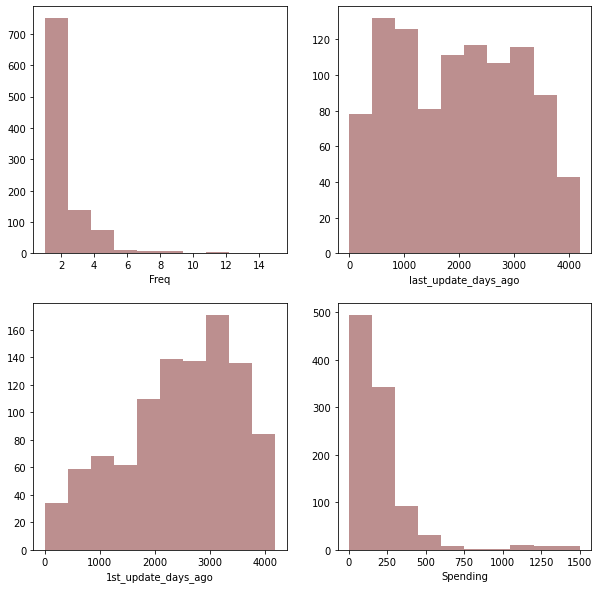

In [11]:
#histograms of frequency distribution of the frequency and spending variables
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
i=0

for row in ax:
    for col in row:
        n=quantv_freq_df.columns[i]
        i=i+1
        plt.subplot(2,2,i, xlabel=n)
        plt.hist(quantv_freq_df[n], color='rosybrown')        

plt.show()

Among the purchasers, 70% had 2 transactions in the last year, and 81% spent up to $300. 

In [12]:
#rename the frequency column name
purchaser_df.rename(columns={'Freq':'Purchase_Frequency'}, inplace=True)
purchaser_df.head(2)

C:\Users\aline\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Purchase_Frequency,last_update_days_ago,1st_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1,128
2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1,127


Text(0.5, 0, 'Frequency of Purchase')

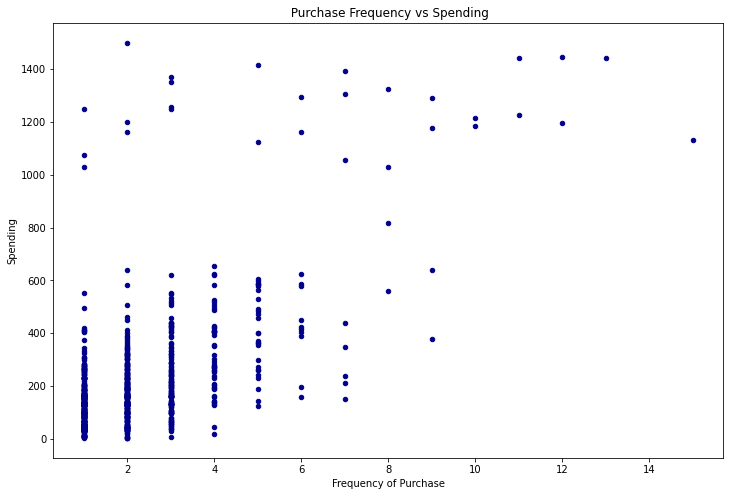

In [13]:
#scatterplot of Frequency and Spending variables to check any possible relationship
ax= purchaser_df.plot.scatter(x='Purchase_Frequency',y='Spending',c='DarkBlue', figsize=(12,8), 
                              title=' Purchase Frequency vs Spending')
ax.set_xlabel('Frequency of Purchase')

According to the scatterplot, we can see a certain relationship between the number the transactions in the last year and the spending. We note that there are many more transactions among customers who purchased a few times in the last year and the value spent this time is not so high. We also find that, in general, customers who made more transactions last year, also spent more money this year, even though the number of those customers is low.   
A correlation analysis should be conduct to investigate deeper if there is any significant relationship between both variables.

In [14]:
#Descriptive statistitics segmented by gender and spending
purchaser_df.groupby(['Gender_male'])['Spending'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender_male,,,,,,,,
0,486.0,210.039095,222.973246,3.0,96.25,160.0,248.0,1443.0
1,514.0,200.719844,218.727285,3.0,89.00,149.0,229.0,1500.0


Text(0.5, 1.0, 'Spending by Gender')

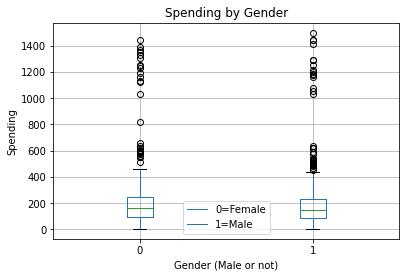

In [15]:
#spending by gender boxplot
ax2=purchaser_df.boxplot(column='Spending', by='Gender_male')
ax2.set_ylabel('Spending')
ax2.set_xlabel('Gender (Male or not)')
ax2.legend(["0=Female", "1=Male"])
plt.suptitle('')
plt.title('Spending by Gender')

Males have a slighly lower average of spending.

In [16]:
#Descriptive statistitics segmented by web order and spending
purchaser_df.groupby(['Web_order'])['Spending'].describe()

,count,mean,std,min,25%,50%,75%,max
Web_order,,,,,,,,
0,456.0,208.710526,222.477962,3.0,98.0,160.0,230.00,1500.0
1,544.0,202.347426,219.434655,3.0,85.0,144.0,239.25,1443.0


Text(0.5, 1.0, 'Spending by Type of Order (Web Order)')

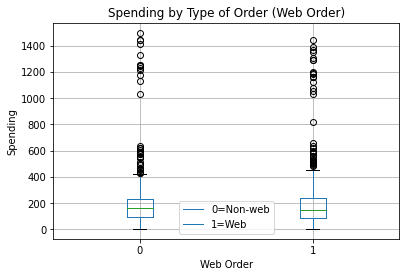

In [17]:
#distribution of spending by type of order 
ax2=purchaser_df.boxplot(column='Spending', by='Web_order')
ax2.set_ylabel('Spending')
ax2.set_xlabel('Web Order')
ax2.legend(["0=Non-web", "1=Web"])
plt.suptitle('')
plt.title('Spending by Type of Order (Web Order)')

The average of spending is 11% higher when the orders are offline (based on the median value). 

In [18]:
#Descriptive statistitics segmented by US address and spending
purchaser_df.groupby(['US'])['Spending'].describe()

,count,mean,std,min,25%,50%,75%,max
US,,,,,,,,
0,167.0,212.736527,201.466407,3.0,106.0,164.0,259.5,1441.0
1,833.0,203.747899,224.487293,3.0,88.0,149.0,230.0,1500.0


Text(0.5, 1.0, 'Spending and US Address')

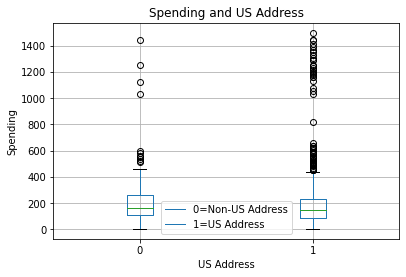

In [19]:
#distribution of spending and US address
ax2=purchaser_df.boxplot(column='Spending', by='US')
ax2.set_ylabel('Spending')
ax2.set_xlabel('US Address')
ax2.legend(["0=Non-US Address", "1=US Address"])
plt.suptitle('')
plt.title('Spending and US Address')

Most of the purchasers have a US address. Apparently, there is a sligtly difference between US and non-US purchasers, people who do not have a US address seem to spend 10% more on average (based on the median values). 

In [20]:
cols=[]
for i in purchaser_df.columns:
    if i.startswith('source'):
        cols.append(i)
cols.append('US')
cols.append('Web_order')
cols.append('Gender_male'),
cols.append('Address_is_res')      

In [21]:
cols

['source_a',
 'source_c',
 'source_b',
 'source_d',
 'source_e',
 'source_m',
 'source_o',
 'source_h',
 'source_r',
 'source_s',
 'source_t',
 'source_u',
 'source_p',
 'source_x',
 'source_w',
 'US',
 'Web_order',
 'Gender_male',
 'Address_is_res']

In [22]:
#create a new dataframe to be used later for dummy variables only
binary_df=purchaser_df[cols]
binary_df.head(5)

,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,US,Web_order,Gender_male,Address_is_res
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [23]:
#frequency distribution (count) of dummy variables
binary_df.apply(lambda x: x.value_counts())

,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,US,Web_order,Gender_male,Address_is_res
0,803,956,964,953,866,981,987,988,926,968,971,831,989,983,846,167,456,486,777
1,197,44,36,47,134,19,13,12,74,32,29,169,11,17,154,833,544,514,223


- Most of the customers who purchased have a US address (83%);  
- Around 77% of the purchasers' address is not residential.  
- No significant difference between number of males and females among the purchasers. 
- Catalogs A, U and W are the most bought.
- The least purchased catalogs are catalogs O, H and P. 

In [24]:
#count of possible null/missing values
purchaser_df.isnull().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Purchase_Frequency      0
last_update_days_ago    0
1st_update_days_ago     0
Web_order               0
Gender_male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

In this case, we have no missing values for any variable. However, if null values were present, we have some alternatives to handle this situation:
- Drop or ignore those values if the missing data is relatively low. A con of this practice could be the loss of important information. 
- For quantitative variables with null values, one option could be the replacement of the values for the mean or median of the variable. If the variable is categorical, we could replace missing values for the mode of the column. The downside of this alternative is that inferring values for the nulls could cause bias to the analysis.  

In all missing values situations, the analysts' team should discuss it and make the decision based on which choice is less harmful to their analysis.  

In [30]:
bins_labels = ['1-5', '6-10', '11-15']
cut_bins = [0, 6, 11, 16]
purchaser_df['Freq_bins'] = pd.cut(purchaser_df['Purchase_Frequency'], bins=cut_bins, labels=bins_labels)
purchaser_df.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Purchase_Frequency,last_update_days_ago,1st_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase,Spending,Freq_bins
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1,128,1-5
2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1,127,1-5
8,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,525,2914,1,1,0,1,489,1-5
9,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3215,3215,0,0,0,1,174,1-5
13,14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2081,2438,0,1,0,1,1416,1-5
14,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1465,1465,0,0,1,1,192,1-5
18,19,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1879,1914,1,1,1,1,130,1-5
20,21,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2943,2984,1,0,0,1,386,1-5
21,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1928,1983,0,1,0,1,161,1-5
23,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1463,1486,0,0,1,1,174,1-5


In [31]:
#count of unique values for the "Frequency" variable
purchaser_df['Freq_bins'].value_counts()

1-5      976
6-10      20
11-15      4
Name: Freq_bins, dtype: int64

97.6% of the purchasers had up to 5 transactions and only 0.4% made over 10 transactions last year. 

In [32]:
purchaser_df['Spending_bins'] = pd.qcut(purchaser_df['Spending'], q=4, precision=0)
print(purchaser_df['Spending_bins'])

0         (95.0, 153.0]
2         (95.0, 153.0]
8       (234.0, 1500.0]
9        (153.0, 234.0]
13      (234.0, 1500.0]
             ...       
1991        (2.0, 95.0]
1992      (95.0, 153.0]
1994     (153.0, 234.0]
1995        (2.0, 95.0]
1996        (2.0, 95.0]
Name: Spending_bins, Length: 1000, dtype: category
Categories (4, interval[float64]): [(2.0, 95.0] < (95.0, 153.0] < (153.0, 234.0] < (234.0, 1500.0]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
#count of unique values for the "spending" variable
purchaser_df['Spending_bins'].value_counts().sort_index(axis=0, ascending=True)

(2.0, 95.0]        250
(95.0, 153.0]      252
(153.0, 234.0]     248
(234.0, 1500.0]    250
Name: Spending_bins, dtype: int64

75% of the purchasers spent up to $ 234. 

In [34]:
#count where the spending is higher than $500
spending = purchaser_df.apply(lambda x : True
            if x['Spending'] > 500 else False, axis = 1)
count_rows = len(spending[spending == True].index)
print(count_rows/1000*100,"% of the purchasers spent more than $500.")

6.1 % of the purchasers spent more than $500.


In [35]:
import seaborn as sns

In [37]:
#conduct correlation analysis for the frequency and spending variables
corr=purchaser_df[['Purchase_Frequency', 'Spending']].corr()
corr

,Purchase_Frequency,Spending
Purchase_Frequency,1.000000,0.644742
Spending,0.644742,1.000000


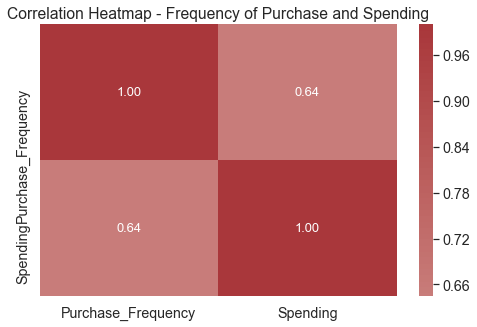

In [38]:
#create a heatmap to demonstrate the correlation magnitude between frequency and spending variables
sns.set(font_scale=1.3) #adjust the font size of the axes

fig, ax = plt.subplots(figsize=(8,5)) #adjust the figure size
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, annot_kws={'fontsize':13},
            fmt=".2f", cmap="vlag", center=0) #annot argument writes the data value into each cell 
                                                #fmt parameter add text to the heatmap cell and formats the cell values   
    
ax.set_title('Correlation Heatmap - Frequency of Purchase and Spending')
plt.show()

The correlation coefficient between frequency and spending is 0.64, which is considered a moderate association, meaning that the more the customers bought in the last year, the higher the amount spent, and vice-versa. However, it is also important to reinforce that purchasers with high-frequency transactions comprise a low number, and the most common frequency of purchase was 2 transactions in the last year.

In [42]:
#create a new dataframe with frequency values below 8 only
purchaser_df2=purchaser_df[purchaser_df['Purchase_Frequency'] < 8]
purchaser_df2.head(10)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Purchase_Frequency,last_update_days_ago,1st_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase,Spending,Freq_bins,Spending_bins
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1,128,1-5,"(95.0, 153.0]"
2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1,127,1-5,"(95.0, 153.0]"
8,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,525,2914,1,1,0,1,489,1-5,"(234.0, 1500.0]"
9,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3215,3215,0,0,0,1,174,1-5,"(153.0, 234.0]"
13,14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2081,2438,0,1,0,1,1416,1-5,"(234.0, 1500.0]"
14,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1465,1465,0,0,1,1,192,1-5,"(153.0, 234.0]"
18,19,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1879,1914,1,1,1,1,130,1-5,"(95.0, 153.0]"
20,21,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2943,2984,1,0,0,1,386,1-5,"(234.0, 1500.0]"
21,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1928,1983,0,1,0,1,161,1-5,"(153.0, 234.0]"
23,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1463,1486,0,0,1,1,174,1-5,"(153.0, 234.0]"


In [43]:
#correlation table for frequency values of transactions below 8
corr2=purchaser_df2[['Purchase_Frequency', 'Spending']].corr()
corr2

,Purchase_Frequency,Spending
Purchase_Frequency,1.000000,0.479004
Spending,0.479004,1.000000


As expected, we observe from the table above that the correlation coefficient decreases as the number of transactions in the last year decreases. It is due to the high values spent by the few people who purchased many times in the last year (outliers in this case). 